In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.0001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'mean_square_error', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 8000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

96/8000: 	3.4524358321545687
itr 7597
Iteration 7597/8000: 	3.452426038638153
itr 7598
Iteration 7598/8000: 	3.452416221246679
itr 7599
Iteration 7599/8000: 	3.4524064089272803
itr 7600
Iteration 7600/8000: 	3.4523966067914964
itr 7601
Iteration 7601/8000: 	3.452387274130729
itr 7602
Iteration 7602/8000: 	3.4523779843320157
itr 7603
Iteration 7603/8000: 	3.4523686480007854
itr 7604
Iteration 7604/8000: 	3.452359336566996
itr 7605
Iteration 7605/8000: 	3.452350037710711
itr 7606
Iteration 7606/8000: 	3.4523407012746237
itr 7607
Iteration 7607/8000: 	3.4523313760777747
itr 7608
Iteration 7608/8000: 	3.4523220335955913
itr 7609
Iteration 7609/8000: 	3.45231272680546
itr 7610
Iteration 7610/8000: 	3.452303396267303
itr 7611
Iteration 7611/8000: 	3.4522941363706607
itr 7612
Iteration 7612/8000: 	3.452284759642848
itr 7613
Iteration 7613/8000: 	3.452275438023626
itr 7614
Iteration 7614/8000: 	3.4522661226959075
itr 7615
Iteration 7615/8000: 	3.4522568078747184
itr 7616
Iteration 7616/8000: 	

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

42665, 3.459426954215682, 3.4594136666932287, 3.4594004143226593, 3.459387125158071, 3.4593738435191934, 3.4593605803146206, 3.4593472744594522, 3.459333974979569, 3.459320695765523, 3.459307469652455, 3.4592941402229065, 3.459280893568099, 3.459267591933981, 3.4592543561597413, 3.459241042900293, 3.4592277353147676, 3.4592144922184858, 3.459201219427894, 3.4591879328124837, 3.4591746455515904, 3.4591613861505803, 3.4591480859947277, 3.4591347856010692, 3.459121516584194, 3.4591082235098134, 3.4590949532517197, 3.459082338136814, 3.4590697371068413, 3.4590571190377446, 3.45904450060571, 3.459031859629829, 3.459019240156073, 3.4590066433313367, 3.45899399051254, 3.4589813723633633, 3.458968772923131, 3.4589561392379635, 3.4589435255713767, 3.4589308987608782, 3.458918301599641, 3.458905675647276, 3.4588930546131547, 3.4588804458005185, 3.4588678397380983, 3.458855205784516, 3.45884256177589, 3.458829954230964, 3.4588173579055566, 3.4588047368679686, 3.458792146987887, 3.4587795013267466

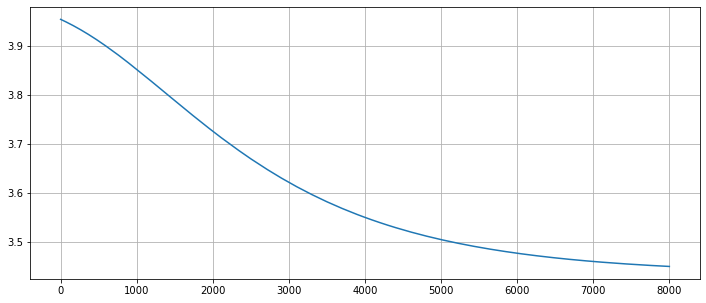

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.93421835]
 [0.0358886 ]
 [0.02989301]]
[1. 0. 0.] <-> [[0.935898  ]
 [0.03423415]
 [0.02986788]]
[1. 0. 0.] <-> [[0.86228806]
 [0.11493638]
 [0.02277557]]
[1. 0. 0.] <-> [[0.89598095]
 [0.07258754]
 [0.03143149]]
[1. 0. 0.] <-> [[0.9123956 ]
 [0.05686764]
 [0.03073674]]
[0. 1. 0.] <-> [[0.86591065]
 [0.1076695 ]
 [0.02641986]]
[0. 0. 1.] <-> [[0.90186954]
 [0.08551794]
 [0.01261246]]
[0. 0. 1.] <-> [[0.8596573 ]
 [0.11697299]
 [0.02336975]]
[1. 0. 0.] <-> [[0.86270946]
 [0.11459181]
 [0.02269876]]
[1. 0. 0.] <-> [[0.9533262]
 [0.0168336]
 [0.0298402]]
[1. 0. 0.] <-> [[0.95333976]
 [0.01682017]
 [0.02984006]]
[1. 0. 0.] <-> [[0.9470997 ]
 [0.02304143]
 [0.02985897]]
[0. 1. 0.] <-> [[0.873354  ]
 [0.10656697]
 [0.02007898]]
[0. 0. 1.] <-> [[0.900546  ]
 [0.08653614]
 [0.01291785]]
[1. 0. 0.] <-> [[0.8964228 ]
 [0.07215966]
 [0.03141754]]
[1. 0. 0.] <-> [[0.91333157]
 [0.0559765 ]
 [0.0306919 ]]
[1. 0. 0.] <-> [[0.8699935 ]
 [0.10004526]
 [0.0299613 ]]
[1. 0. 0.] <-> [[